In [1]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mlp
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
SHEET_ID = '1BH_B_Df_7e2l6AH8_8a0aK70nlAJXfCTwfyCgxkL5C8'
SHEET_NAME = 'cdr.fyi_raw'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
cdr_fyi = pd.read_csv(url, decimal=",")

In [10]:
cdr_fyi[cdr_fyi["Announcement Date"] == " "]

,Announcement Date,Announcement Link,Demand-side Marketplace,Supply-side Marketplace,CDR Method,Total price (USD),Purchaser,Status,Supplier,Tons Delivered,Tons Purchased


In [3]:
cdr_fyi["Total price (USD)"].replace(0.0, np.NaN, inplace=True)
cdr_fyi["Price per Ton"] = cdr_fyi["Total price (USD)"] / cdr_fyi["Tons Purchased"]
cdr_fyi["Announcement Date"] = cdr_fyi["Announcement Date"].str.split(" ", n=1).str[0]
cdr_fyi

,Announcement Date,Announcement Link,Demand-side Marketplace,Supply-side Marketplace,CDR Method,Total price (USD),Purchaser,Status,Supplier,Tons Delivered,Tons Purchased,Price per Ton
0,2021-04-13,https://charmindustrial.com/order?orderId=rec9...,NaN,NaN,Biooil,NaN,Cosora,delivered,Charm Industrial,1.000000,1.000000,NaN
1,2022-04-08,https://registry.puro.earth/carbon-sequestration,Pledge,Puro,Biochar,NaN,Orkestro,delivered,Bussme,0.999999,0.999999,NaN
2,2021-06-30,https://charmindustrial.com/order?orderId=recW...,NaN,Carbon Removed,Biooil,NaN,Aggregate Purchase,delivered,Charm Industrial,2.000000,2.000000,NaN
3,2022-01-17,https://registry.puro.earth/carbon-sequestration,NaN,Puro,Biochar,NaN,Swiss Re,delivered,Hjelmsäters Egendom,11.999989,11.999989,NaN
4,2022-12-19,https://registry.puro.earth/carbon-sequestrati...,NaN,Puro,Biochar,4290.0,Blackrock,delivered,Freres Biochar,39.000000,39.000000,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...
982,2023-04-04,https://docs.google.com/spreadsheets/d/1yz9AG2...,Patch,Carbonfuture,Biochar,1000.0,Aggregate Purchase (Supplier Report),delivered,NovoCarbo,5.000000,5.000000,200.0
983,2023-05-24,https://charmindustrial.com/order?orderId=recU...,NaN,NaN,Biooil,600000.0,Shopify,partial,Charm Industrial,123.327000,1000.000000,600.0
984,2022-01-11,https://registry.puro.earth/carbon-sequestration,Pledge,Puro,Biochar,NaN,Checkout,delivered,Oregon Biochar Solutions,149.999865,149.999865,NaN
985,2023-03-27,supercritical report,NaN,Supercritical,Enhanced Weathering,NaN,Trafalgar House Penseions Administration Limited,undelivered,UNDO,0.000000,2.000000,NaN


In [6]:
cdr_fyi[cdr_fyi["Announcement Date"] == np.NaN]

,Announcement Date,Announcement Link,Demand-side Marketplace,Supply-side Marketplace,CDR Method,Total price (USD),Purchaser,Status,Supplier,Tons Delivered,Tons Purchased,Price per Ton


In [102]:
# filter the df to only include the CDR method of biochar
cdr_fyi = cdr_fyi[cdr_fyi['CDR Method'] == 'Biochar']
cdr_fyi

,Announcement Date,Announcement Link,Demand-side Marketplace,Supply-side Marketplace,CDR Method,Total price (USD),Purchaser,Status,Supplier,Tons Delivered,Tons Purchased,Price per Ton
1,2022-04-08,https://registry.puro.earth/carbon-sequestration,Pledge,Puro,Biochar,NaN,Orkestro,delivered,Bussme,0.999999,0.999999,NaN
3,2022-01-17,https://registry.puro.earth/carbon-sequestration,NaN,Puro,Biochar,NaN,Swiss Re,delivered,Hjelmsäters Egendom,11.999989,11.999989,NaN
4,2022-12-19,https://registry.puro.earth/carbon-sequestrati...,NaN,Puro,Biochar,4290.0,Blackrock,delivered,Freres Biochar,39.000000,39.000000,110.0
7,2022-03-15,marketplace report,Supercritical,Puro,Biochar,NaN,Howells Associates,delivered,Freres Biochar,20.000000,20.000000,NaN
8,2021-12-09,https://bit.ly/3zXGj3P,NaN,Carbonfuture,Biochar,NaN,Aggregate Purchase,delivered,Aggregate Supplier (Marketplace Report),642.380000,642.380000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
976,2023-01-16,supplier report,Patch,Carbonfuture,Biochar,1400.0,Planet A Ventures,delivered,NovoCarbo,7.000000,7.000000,200.0
977,2022-12-01,NaN,NaN,Milkywire,Biochar,17500.0,WRLD Foundation,undelivered,Husk,0.000000,175.000000,100.0
978,2023-04-16,https://docs.google.com/spreadsheets/d/129BzKz...,Klimate,Klimate,Biochar,NaN,Aggregate Purchase,undelivered,Carbonfuture,0.000000,96.700000,NaN
982,2023-04-04,https://docs.google.com/spreadsheets/d/1yz9AG2...,Patch,Carbonfuture,Biochar,1000.0,Aggregate Purchase (Supplier Report),delivered,NovoCarbo,5.000000,5.000000,200.0


In [103]:
cdr_fyi["Tons Delivered"].sum()

75484.54157335519

In [104]:
print(cdr_fyi['Supplier'].nunique())
cdr_fyi.groupby(["Supplier"]).sum("Tons Purchased").sort_values("Tons Purchased", ascending=False).head(10)

36


,Total price (USD),Tons Delivered,Tons Purchased,Price per Ton
Supplier,,,,
Mash makes,118700.0,0.000000,51533.000000,318.203310
Wakefield Biochar,3000.0,20934.000000,34450.000000,200.000000
Carbonfuture,34504.0,0.000000,18371.810000,290.000000
Freres Biochar,161977.0,7092.996923,15655.104173,757.344437
Douglas County Forest Products,490531.0,11403.001295,13148.001295,2356.213788
Aggregate Supplier (Marketplace Report),0.0,8881.890000,8881.890000,0.000000
Carbofex,1685092.0,3975.997829,8047.308829,2950.008825
Carbo Culture,152688.0,0.000000,7888.000000,937.600000
Aperam BioEnergia,118400.0,7300.000000,7300.000000,148.000000


In [105]:
deliver = cdr_fyi.groupby(["Supplier"]).sum("Tons Delivered").sort_values("Tons Delivered", ascending=False)
deliver[deliver["Tons Delivered"] > 0]

,Total price (USD),Tons Delivered,Tons Purchased,Price per Ton
Supplier,,,,
Wakefield Biochar,3000.00,20934.000000,34450.000000,200.000000
Douglas County Forest Products,490531.00,11403.001295,13148.001295,2356.213788
Aggregate Supplier (Marketplace Report),0.00,8881.890000,8881.890000,0.000000
Aperam BioEnergia,118400.00,7300.000000,7300.000000,148.000000
Freres Biochar,161977.00,7092.996923,15655.104173,757.344437
Oregon Biochar Solutions,255485.00,4098.997384,6506.182384,185.000000
Carbofex,1685092.00,3975.997829,8047.308829,2950.008825
NovoCarbo,228074.51,1986.809946,1986.809855,4582.752494
Carbon Cycle,3840.00,1781.973515,3345.754700,320.672289


In [106]:
# create a list of all suppliers
suppliers = cdr_fyi['Supplier'].unique().tolist()
suppliers

['Bussme',
 'Hjelmsäters Egendom',
 'Freres Biochar',
 'Aggregate Supplier (Marketplace Report)',
 'Oregon Biochar Solutions ',
 'Carbofex',
 'Karbon Capture',
 'Douglas County Forest Products',
 'Jeffries Group',
 'Premier Forest',
 'Wakefield Biochar',
 'Nordgau',
 'Pyrocal',
 'Mash makes',
 'Oplandske Bio, Rudshøgda',
 'UNDO',
 'NovoCarbo',
 'V-Grid Energy Systems',
 'Echo2',
 'Carbonfuture',
 'Terra Fertilis',
 'Carbon Cycle',
 'Bio Restorative Ideas',
 'Planboo',
 'Ecoera',
 'Carbo Culture',
 'Aperam BioEnergia',
 'Emergent Waste Solution',
 'Husk',
 'Gekka Biochar',
 'Netzero',
 'Sonnenerde',
 'Pacific Biochar',
 'Auen Pflege Dienst APD Flaach',
 'Biokol.se',
 'Climate Robotics Inc.',
 nan]

In [107]:
# sort this list by how "tons purchased"
suppliers.sort(key=lambda x: cdr_fyi[cdr_fyi['Supplier'] == x]['Tons Purchased'].sum(), reverse=True)
suppliers

['Mash makes',
 'Wakefield Biochar',
 'Carbonfuture',
 'Freres Biochar',
 'Douglas County Forest Products',
 'Aggregate Supplier (Marketplace Report)',
 'Carbofex',
 'Carbo Culture',
 'Aperam BioEnergia',
 'Oregon Biochar Solutions ',
 'Echo2',
 'Husk',
 'Carbon Cycle',
 'Pacific Biochar',
 'NovoCarbo',
 'Ecoera',
 'Climate Robotics Inc.',
 'Bio Restorative Ideas',
 'Bussme',
 'Nordgau',
 'Hjelmsäters Egendom',
 'Oplandske Bio, Rudshøgda',
 'V-Grid Energy Systems',
 'Terra Fertilis',
 'Auen Pflege Dienst APD Flaach',
 'Premier Forest',
 'Planboo',
 'Sonnenerde',
 'Netzero',
 'Karbon Capture',
 'Emergent Waste Solution',
 'Jeffries Group',
 'Gekka Biochar',
 'Pyrocal',
 'Biokol.se',
 'UNDO',
 nan]

In [108]:
suppliers.sort(key=lambda x: cdr_fyi[cdr_fyi['Supplier'] == x]['Tons Delivered'].sum(), reverse=True)
suppliers

['Wakefield Biochar',
 'Douglas County Forest Products',
 'Aggregate Supplier (Marketplace Report)',
 'Aperam BioEnergia',
 'Freres Biochar',
 'Oregon Biochar Solutions ',
 'Carbofex',
 'NovoCarbo',
 'Carbon Cycle',
 'Pacific Biochar',
 'Echo2',
 'Bussme',
 'Ecoera',
 'Nordgau',
 'Hjelmsäters Egendom',
 'Oplandske Bio, Rudshøgda',
 'Terra Fertilis',
 'Premier Forest',
 'Planboo',
 'Netzero',
 'V-Grid Energy Systems',
 'Karbon Capture',
 'Emergent Waste Solution',
 'Jeffries Group',
 'Gekka Biochar',
 'Pyrocal',
 'Mash makes',
 'Carbonfuture',
 'Carbo Culture',
 'Husk',
 'Climate Robotics Inc.',
 'Bio Restorative Ideas',
 'Auen Pflege Dienst APD Flaach',
 'Sonnenerde',
 'Biokol.se',
 'UNDO',
 nan]

In [109]:
# how much in percentage of the total tons purchased does the top 10 suppliers represent?
top_20_suppliers_p = cdr_fyi.groupby(["Supplier"]).sum("Tons Purchased").sort_values("Tons Purchased", ascending=False).head(20)
top_20_suppliers_p['Tons Purchased'].sum() / cdr_fyi['Tons Purchased'].sum()

0.9826641097054634

In [110]:
# Share of aggregate purchased tons
8881.890000 / cdr_fyi['Tons Purchased'].sum()

0.04523745221350604

In [111]:
top_20_suppliers_d = cdr_fyi.groupby(["Supplier"]).sum("Tons Delivered").sort_values("Tons Delivered", ascending=False).head(20)
top_20_suppliers_d['Tons Delivered'].sum() / cdr_fyi['Tons Delivered'].sum()

0.9948995634460356

In [112]:
8881.890000 / cdr_fyi['Tons Delivered'].sum()

0.1176650187557761

In [113]:
# give me the top 20 as a list
top_20_suppliers_list_p = top_20_suppliers_p.index.tolist()
top_20_suppliers_list_p

['Mash makes',
 'Wakefield Biochar',
 'Carbonfuture',
 'Freres Biochar',
 'Douglas County Forest Products',
 'Aggregate Supplier (Marketplace Report)',
 'Carbofex',
 'Carbo Culture',
 'Aperam BioEnergia',
 'Oregon Biochar Solutions ',
 'Echo2',
 'Husk',
 'Carbon Cycle',
 'Pacific Biochar',
 'NovoCarbo',
 'Ecoera',
 'Climate Robotics Inc.',
 'Bio Restorative Ideas',
 'Bussme',
 'Nordgau']

In [114]:
top_20_suppliers_list_d = top_20_suppliers_d.index.tolist()
top_20_suppliers_list_d

['Wakefield Biochar',
 'Douglas County Forest Products',
 'Aggregate Supplier (Marketplace Report)',
 'Aperam BioEnergia',
 'Freres Biochar',
 'Oregon Biochar Solutions ',
 'Carbofex',
 'NovoCarbo',
 'Carbon Cycle',
 'Pacific Biochar',
 'Echo2',
 'Bussme',
 'Ecoera',
 'Nordgau',
 'Hjelmsäters Egendom',
 'Oplandske Bio, Rudshøgda',
 'Terra Fertilis',
 'Premier Forest',
 'Planboo',
 'Netzero']

In [115]:
# create a dictionary of all suppliers where the values of all is equal to "other" except for the 20 in the top
supplier_dict = {}
for supplier in suppliers:
    if supplier in top_20_suppliers_list:
        supplier_dict[supplier] = supplier
    else:
        supplier_dict[supplier] = "Other"
supplier_dict

NameError: name 'top_20_suppliers_list' is not defined

In [116]:
supplier_dict = {'Wakefield Biochar': 'United States',
 'Douglas County Forest Products': 'United States',
 'Aggregate Supplier (Marketplace Report)': 'Other',
 'Aperam BioEnergia': 'Brazil',
 'Freres Biochar': 'United States',
 'Oregon Biochar Solutions ': 'United States',
 'Carbofex': 'Finland',
 'NovoCarbo': 'Germany',
 'Carbon Cycle': 'United States',
 'Pacific Biochar': 'United States',
 'Echo2': 'Australia',
 'Bussme': 'Sweden',
 'Ecoera': 'Sweden',
 'Nordgau': 'Germany',
 'Hjelmsäters Egendom': 'Sweden',
 'Oplandske Bio, Rudshøgda': 'Norway',
 'Terra Fertilis': 'France',
 'Premier Forest': 'United Kingdom',
 'Planboo': 'Sweden',
 'Netzero': 'France',
 'V-Grid Energy Systems': 'United States',
 'Karbon Capture': 'Other',
 'Emergent Waste Solution': 'Other',
 'Jeffries Group': 'Other',
 'Gekka Biochar': 'Other',
 'Pyrocal': 'Other',
 'Mash makes': 'India',
 'Carbonfuture': 'Germany',
 'Carbo Culture': 'Finland',
 'Husk': 'Other',
 'Climate Robotics Inc.': 'United States',
 'Bio Restorative Ideas': 'United States',
 'Auen Pflege Dienst APD Flaach': 'Other',
 'Sonnenerde': 'Other',
 'Biokol.se': 'Other',
 'UNDO': 'United Kingdom',
 np.nan: 'Other'}

In [117]:
# count many keys in the dictionary do not have the value other
len([k for k, v in supplier_dict.items() if v != "Other"])

26

In [118]:
# create a new column in the dataframe with the supplier_dict
cdr_fyi['Supplier Origin'] = cdr_fyi['Supplier'].map(supplier_dict)
cdr_fyi[['Supplier', 'Supplier Origin']]

C:\Users\ffr\AppData\Local\Temp\ipykernel_21792\1843714483.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Supplier,Supplier Origin
1,Bussme,Sweden
3,Hjelmsäters Egendom,Sweden
4,Freres Biochar,United States
7,Freres Biochar,United States
8,Aggregate Supplier (Marketplace Report),Other
...,...,...
976,NovoCarbo,Germany
977,Husk,Other
978,Carbonfuture,Germany
982,NovoCarbo,Germany


In [119]:
# ALL BIOCHAR DELIVERED
deliver = cdr_fyi.groupby(["Supplier"]).sum("Tons Delivered").sort_values("Tons Delivered", ascending=False)
deliver = deliver[deliver["Tons Delivered"] > 0]
deliver.reset_index(inplace=True)
deliver['Supplier Origin'] = deliver['Supplier'].map(supplier_dict)
deliver[["Supplier", "Supplier Origin", "Tons Delivered"]]

,Supplier,Supplier Origin,Tons Delivered
0,Wakefield Biochar,United States,20934.000000
1,Douglas County Forest Products,United States,11403.001295
2,Aggregate Supplier (Marketplace Report),Other,8881.890000
3,Aperam BioEnergia,Brazil,7300.000000
4,Freres Biochar,United States,7092.996923
5,Oregon Biochar Solutions,United States,4098.997384
6,Carbofex,Finland,3975.997829
7,NovoCarbo,Germany,1986.809946
8,Carbon Cycle,United States,1781.973515
9,Pacific Biochar,United States,1500.000000


In [120]:
og = cdr_fyi.groupby(["Supplier Origin"]).sum("Tons Purchased").sort_values("Tons Purchased", ascending=False)
og = og[["Tons Delivered", "Tons Purchased"]].reset_index()
og

,Supplier Origin,Tons Delivered,Tons Purchased
0,United States,46981.969118,78291.149803
1,India,0.000000,51533.000000
2,Germany,2767.704408,21218.619550
3,Finland,3975.997829,15935.308829
4,Other,9095.894115,13364.630315
5,Brazil,7300.000000,7300.000000
6,Australia,1409.999784,4498.621784
7,Sweden,2650.999502,2890.999502
8,Norway,630.356496,635.356496
9,France,464.932687,464.932687


In [121]:
print(og["Tons Purchased"].sum()) 
print(cdr_fyi['Tons Purchased'].sum())

print(og["Tons Delivered"].sum()) 
print(cdr_fyi['Tons Delivered'].sum())

196339.30660109624
196339.3066010962
75484.5415733552
75484.54157335519


# Tons Purchased

In [122]:
ogp = og.sort_values("Tons Purchased", ascending=False)[["Supplier Origin", "Tons Purchased"]]
ogp

,Supplier Origin,Tons Purchased
0,United States,78291.149803
1,India,51533.000000
2,Germany,21218.619550
3,Finland,15935.308829
4,Other,13364.630315
5,Brazil,7300.000000
6,Australia,4498.621784
7,Sweden,2890.999502
8,Norway,635.356496
9,France,464.932687


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Finland'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Sweden'),
  Text(8, 0, 'Norway'),
  Text(9, 0, 'France'),
  Text(10, 0, 'United Kingdom')])

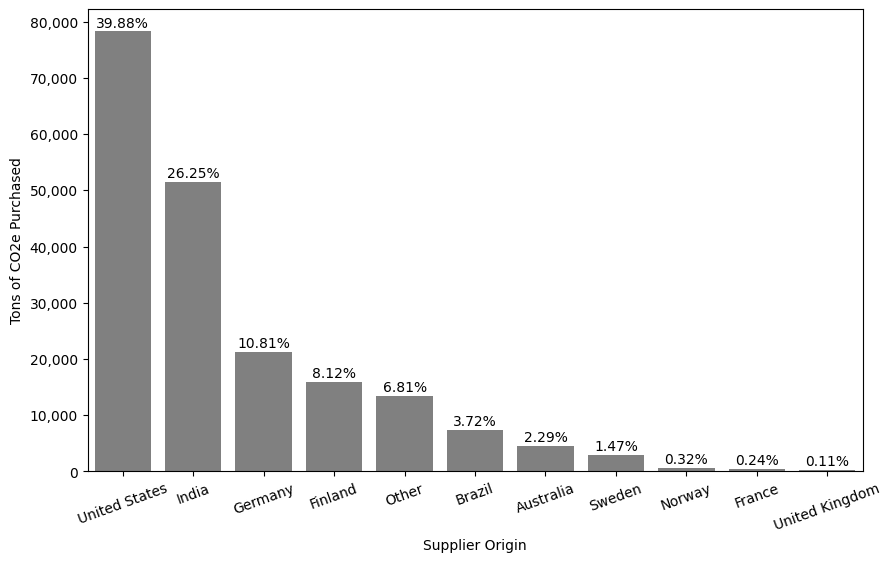

In [123]:
from matplotlib.ticker import FuncFormatter

ogp['Percentage'] = (ogp['Tons Purchased'] / ogp['Tons Purchased'].sum()) * 100
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Supplier Origin', y='Tons Purchased', data=ogp, color='grey')
for i, p in enumerate(barplot.patches):
    height = p.get_height()
    barplot.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}%'.format(ogp['Percentage'][i]),
            ha="center")
barplot.set_ylabel('Tons of CO2e Purchased')
y_labels = barplot.get_yticks()
barplot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation=20)

In [124]:
import plotly.graph_objects as go

# Calculate percentages
ogp['Percentage'] = (ogp['Tons Purchased'] / ogp['Tons Purchased'].sum()) * 100

# Create bar chart
fig = go.Figure(data=go.Bar(
    x=ogp['Supplier Origin'], 
    y=ogp['Tons Purchased'], 
    text=ogp['Percentage'].round(2).apply(lambda x: '{:,.2f}%'.format(x)),  # Add percentage annotations
    textposition='outside', 
    marker_color='grey'
))

# Set figure size, y-axis label, and y-axis tick format
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    yaxis=dict(
        title_text="Tons of CO2e Sold",
        tickformat=",",  # Add comma separators
    ),
    title="Tons of Biochar CO2e Sold per Country (including Pre-purchases)"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=20)

fig.show()

In [125]:
# find the row where supplier origin is equal to "Denmark"
ogp["percentage"] = ogp["Tons Purchased"] / ogp['Tons Purchased'].sum()
ogp

,Supplier Origin,Tons Purchased,Percentage,percentage
0,United States,78291.149803,39.875434,0.398754
1,India,51533.000000,26.246909,0.262469
2,Germany,21218.619550,10.807117,0.108071
3,Finland,15935.308829,8.116209,0.081162
4,Other,13364.630315,6.806905,0.068069
5,Brazil,7300.000000,3.718053,0.037181
6,Australia,4498.621784,2.291249,0.022912
7,Sweden,2890.999502,1.472451,0.014725
8,Norway,635.356496,0.323601,0.003236
9,France,464.932687,0.236801,0.002368


In [126]:
# find the row where supplier origin is equal to "Denmark"
ogp["percentage"] = ogp["Tons Purchased"] / ogp['Tons Purchased'].sum()
ogp

,Supplier Origin,Tons Purchased,Percentage,percentage
0,United States,78291.149803,39.875434,0.398754
1,India,51533.000000,26.246909,0.262469
2,Germany,21218.619550,10.807117,0.108071
3,Finland,15935.308829,8.116209,0.081162
4,Other,13364.630315,6.806905,0.068069
5,Brazil,7300.000000,3.718053,0.037181
6,Australia,4498.621784,2.291249,0.022912
7,Sweden,2890.999502,1.472451,0.014725
8,Norway,635.356496,0.323601,0.003236
9,France,464.932687,0.236801,0.002368


In [127]:
ogp = og.sort_values("Tons Purchased", ascending=False)
# Calculate total tons purchased
total_tons = ogp['Tons Purchased'].sum()

# Create a new column that represents the percentage of the total
ogp['Percentage'] = 100 * ogp['Tons Purchased'] / total_tons
# Update 'Supplier Origin' and 'Tons Purchased' for rows that represent less than 1% of the total
ogp.loc[ogp['Percentage'] < 1, 'Supplier Origin'] = 'Other'
ogp.loc[ogp['Supplier Origin'] == 'Other', 'Tons Purchased'] = ogp[ogp['Supplier Origin'] == 'Other']['Tons Purchased'].sum()

ogp = ogp.drop(columns=['Percentage'])
ogp = ogp.drop_duplicates(subset=['Supplier Origin']).reset_index(drop=True)
ogp

,Supplier Origin,Tons Delivered,Tons Purchased
0,United States,46981.969118,78291.149803
1,India,0.000000,51533.000000
2,Germany,2767.704408,21218.619550
3,Finland,3975.997829,15935.308829
4,Other,9095.894115,14671.607134
5,Brazil,7300.000000,7300.000000
6,Australia,1409.999784,4498.621784
7,Sweden,2650.999502,2890.999502


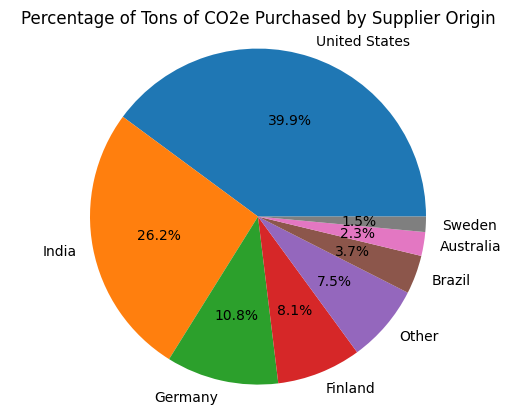

In [128]:
labels = ogp["Supplier Origin"]
sizes = ogp["Tons Purchased"]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of Tons of CO2e Purchased by Supplier Origin")

plt.show()

In [129]:
import plotly.graph_objects as go

# Calculate percentages
ogp['Percentage'] = (ogp['Tons Purchased'] / ogp['Tons Purchased'].sum()) * 100

# Create bar chart
fig = go.Figure(data=go.Bar(
    x=ogp['Supplier Origin'], 
    y=ogp['Tons Purchased'], 
    text=ogp['Percentage'].round(2).apply(lambda x: '{:,.2f}%'.format(x)),  # Add percentage annotations
    textposition='outside', 
    marker_color='grey'
))

# Set figure size, y-axis label, and y-axis tick format
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    yaxis=dict(
        title_text="Tons of CO2e Purchased",
        tickformat=",",  # Add comma separators
    ),
    title="Purchased Tons of CO2e in Biochar per Country"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=20)

fig.show()

# Delivered

In [130]:
ogd = og.sort_values("Tons Delivered", ascending=False)[["Supplier Origin", "Tons Delivered"]]
ogd

,Supplier Origin,Tons Delivered
0,United States,46981.969118
4,Other,9095.894115
5,Brazil,7300.000000
3,Finland,3975.997829
2,Germany,2767.704408
7,Sweden,2650.999502
6,Australia,1409.999784
8,Norway,630.356496
9,France,464.932687
10,United Kingdom,206.687635


In [131]:
import plotly.graph_objects as go

# Calculate percentages
ogd['Percentage'] = (ogd['Tons Delivered'] / ogd['Tons Delivered'].sum()) * 100

# Create bar chart
fig = go.Figure(data=go.Bar(
    x=ogd['Supplier Origin'], 
    y=ogd['Tons Delivered'], 
    text=ogd['Percentage'].round(2).apply(lambda x: '{:,.2f}%'.format(x)),  # Add percentage annotations
    textposition='outside', 
    marker_color='grey'
))

# Set figure size, y-axis label, and y-axis tick format
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    yaxis=dict(
        title_text="Tons of CO2e Delivered",
        tickformat=",",  # Add comma separators
    ),
    title="Tons of Biochar CO2e Delivered per Country"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=20)

fig.show()

In [132]:
# find the row where supplier origin is equal to "Denmark"
print(ogd["Tons Delivered"].sum())
ogd

75484.5415733552


,Supplier Origin,Tons Delivered,Percentage
0,United States,46981.969118,62.240517
4,Other,9095.894115,12.050009
5,Brazil,7300.000000,9.670854
3,Finland,3975.997829,5.267301
2,Germany,2767.704408,3.666584
7,Sweden,2650.999502,3.511977
6,Australia,1409.999784,1.867932
8,Norway,630.356496,0.835080
9,France,464.932687,0.615931
10,United Kingdom,206.687635,0.273815


In [134]:
# show rows of the dataframe "cdr_fyi" where supplier origin is equal to "Denmark"
cdr_fyi[cdr_fyi["Supplier Origin"] == "India"]

,Announcement Date,Announcement Link,Demand-side Marketplace,Supply-side Marketplace,CDR Method,Total price (USD),Purchaser,Status,Supplier,Tons Delivered,Tons Purchased,Price per Ton,Supplier Origin
61,2023-01-16,https://cleantechnica.com/2023/01/16/carbonfut...,NaN,Carbonfuture,Biochar,NaN,Aggregate Purchase,undelivered,Mash makes,0.0,50000.0,NaN,India
155,2022-12-01,NaN,NaN,Milkywire,Biochar,17500.0,WRLD Foundation,undelivered,Mash makes,0.0,175.0,100.00000,India
341,2023-03-31,https://docs.google.com/spreadsheets/d/129BzKz...,Klimate,Klimate,Biochar,NaN,Aggregate Purchase,undelivered,Mash makes,0.0,500.0,NaN,India
481,2021-12-01,NaN,NaN,Milkywire,Biochar,1200.0,WRLD Foundation,undelivered,Mash makes,0.0,12.0,100.00000,India
728,2021-10-20,https://www.klarna.com/assets/sites/15/2021/10...,NaN,Carbonfuture,Biochar,100000.0,Klarna,undelivered,Mash makes,0.0,846.0,118.20331,India
